                                        # Machine Learning Final Project 
                                       Models : Random Forest, Ada boost, Gradient boost, XGBoost : RandomGridSearch
                                       Sampling Methods : Undersampling- Randomized Grid Search
                                       Creator : Sneha Vasudevan

References: 
- https://beckernick.github.io/oversampling-modeling/
- https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3
- https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa
- https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
- https://medium.com/turo-engineering/how-not-to-use-random-forest-265a19a68576
- https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm
- https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf
- https://www.dataschool.io/comparing-supervised-learning-algorithms/
- https://www.kaggle.com/residentmario/oversampling-with-smote-and-adasyn
- https://stats.stackexchange.com/questions/255765/does-random-forest-need-input-variables-to-be-scaled-or-centered
- https://towardsdatascience.com/fraud-detection-under-extreme-class-imbalance-c241854e60c
- https://www.kaggle.com/karvalo/kaggle-2019-survey-eda (DATA)
- https://www.kaggle.com/grfiv4/plotting-feature-importances (PLOTTING FEATURE IMPORTANCE FOR CLASSIFIER MODELS)


In [0]:
#Import Packages 
import pandas as pd
import numpy as np
import matplotlib as mpl
#from plotnine import *

# Visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data-processing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

# Modeling and evaluation modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# Sampling : 
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
    
#warnings 
import warnings
warnings.filterwarnings("ignore")

# Set seed for reproducibility 
SEED = 42

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#Import Dataset - df_new
# 1. Import full data set using Pandas:
##df = pd.read_csv("df_new.csv", low_memory= False)
#df.shape

In [0]:
# Set up shared drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load dataset 
datapath = '/content/drive/Shared drives/Machine Learning/Code/df_new.csv'
df = pd.read_csv(datapath)

In [0]:
#removing first column
df = df.drop(df.columns[0], axis = 1)

In [0]:
# dropping Step. Column Day created from Step will be used instead. 
df = df.drop('step', axis=1) 

In [0]:
df.head(1)

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
0,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,0,0,0,1,0,0,1,1,0,0,0


In [0]:
#Creating X dataframe (predictors). 
#It should include every feature except for the target variable which is "isFraud".
X = df.drop('isFraud', axis=1) 
X.shape

(6362620, 19)

In [0]:
y = df['isFraud']
y.value_counts() # data is unbalanced
#y.head(1)

0    6354407
1       8213
Name: isFraud, dtype: int64

#### Train Test Split 

In [0]:
#Split into train / test set using an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED) #random state = SEED 

# **Undersampling**

In [0]:
#combine them back for resampling : https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36
train_data = pd.concat([X_train, y_train], axis=1)

In [0]:
# separate minority and majority classes
negative = train_data[train_data.isFraud==0]
positive = train_data[train_data.isFraud==1]

In [0]:
# downsample majority
neg_downsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in minority class
 random_state=SEED) # reproducible results

In [0]:
downsampled = pd.concat([positive, neg_downsampled])

In [0]:
# check new class counts
downsampled.head(2)

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4,isFraud
1030389,1735466.52,1735466.52,0.0,0.0,0.0,0.0,1735466.52,2,0,0,0,0,1,1,0,0,0,0,1,1
6168683,316877.85,316877.85,0.0,0.0,0.0,0.0,316877.85,23,0,0,0,0,1,1,0,0,0,0,1,1


In [0]:
downsampled.shape

(13186, 20)

In [0]:
X_train_res = downsampled.drop('isFraud', axis=1) 
X_train_res.head(1)

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
1030389,1735466.52,1735466.52,0.0,0.0,0.0,0.0,1735466.52,2,0,0,0,0,1,1,0,0,0,0,1


In [0]:
y_train_res = downsampled['isFraud']
count = y_train_res.value_counts() # data is balanced
count

1    6593
0    6593
Name: isFraud, dtype: int64

In [0]:
count_test = y_test.value_counts() # train data is balanced
count_test

0    1270904
1       1620
Name: isFraud, dtype: int64

In [0]:
Percentage_imbalance = (count_test[1]/count_test[0])*100
Percentage_imbalance
# As we can see the train dataset is balanced with respect to fraud and unfraud data points, however, the test validation is performed on a severly unbalanced dataset. 
#Therefore, I think looking into TPR, FNR, FPR are good indicators of model validation. 

0.1274683217615178

# Random Forest with Under-sampling - Randomized Grid Search

In [0]:
# Create a Random Forest Classifier instance 
rf = RandomForestClassifier(random_state=SEED)

#Create dictionary of parameters 
rf_param_grid = {
'n_estimators': [50, 100, 500],
'max_depth':[2, 4, 6, 8, 10, 12],
'random_state':[42],
'max_features': ["auto", "log", "sqrt"],
}

rf_Grid = RandomizedSearchCV(rf, rf_param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose= 5)
rf_Grid = rf_Grid.fit(X_train_res,y_train_res)

#find best estimator from RandomizedSearchCV to predict on test data.
rf_Grid_best_estimator = rf_Grid.best_estimator_

#Use best estimator from RandomizedSearchCV to predict on test data.
y_pred_rf_Grid_bestmodel_test = rf_Grid_best_estimator.predict(X_test)

# Generate confusion matrix and classification report 
cm_rf_Grid_test = metrics.confusion_matrix(y_test, y_pred_rf_Grid_bestmodel_test)
clr_rf_Grid_test = metrics.classification_report(y_test, y_pred_rf_Grid_bestmodel_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [0]:
rf_Grid_best_estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rf_Grid.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 50,
 'random_state': 42}

In [0]:
# Print confusion matrix 
print(cm_rf_Grid_test)

[[1270716     188]
 [      4    1616]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_rf_test, FP_rf_test, FN_rf_test, TP_rf_test = confusion_matrix(y_test, y_pred_rf_Grid_bestmodel_test).ravel()
print(TN_rf_test, FP_rf_test, FN_rf_test, TP_rf_test)  

1270716 188 4 1616


In [0]:
# True positive 
TPR_rf_test = TP_rf_test/(TP_rf_test+FN_rf_test)

In [0]:
#false positive rate 
FPR_rf_test = FP_rf_test/(FP_rf_test+TN_rf_test)

In [0]:
# True Negative
TNR_rf_test = TN_rf_test/(TN_rf_test+FP_rf_test) 

In [0]:
# False Negative 
FNR_rf_test = FN_rf_test/(TP_rf_test+FN_rf_test)

In [0]:
# Print classification report
print(clr_rf_Grid_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      1.00      0.94      1620

    accuracy                           1.00   1272524
   macro avg       0.95      1.00      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



In [0]:
# Calculate predicted probabilities 
y_prob_rf_Grid_bestmodel_test = rf_Grid_best_estimator.predict_proba(X_test)
# Calculate roc_auc_score for class 1 
rf_Grid_roc_auc_test = metrics.roc_auc_score(y_test, y_prob_rf_Grid_bestmodel_test[:,1])
print(rf_Grid_roc_auc_test)

0.9996041480593226


In [0]:
#rf_Grid_feature_importance = rf_Grid_best_estimator.feature_importances_
#rf_Grid_feat_importances = pd.Series(rf_Grid_feature_importance, index=X)
#rf_Grid_feat_importances.nlargest(5).plot(kind='barh')
#plt.show()

In [0]:
# Predict train data 
y_pred_rf_Grid_train = rf_Grid_best_estimator.predict(X_train_res)

# Generate confusion matrix and classification report 
cm_rf_Grid_train = metrics.confusion_matrix(y_train_res, y_pred_rf_Grid_train)
clr_rf_Grid_train = metrics.classification_report(y_train_res, y_pred_rf_Grid_train)

In [0]:
# Print confusion matrix
print(cm_rf_Grid_train)

[[6593    0]
 [   5 6588]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_rf_train, FP_rf_train, FN_rf_train, TP_rf_train = confusion_matrix(y_train_res, y_pred_rf_Grid_train).ravel()
print(TN_rf_train, FP_rf_train, FN_rf_train, TP_rf_train)  

6593 0 5 6588


In [0]:
# True positive 
TPR_rf_train = TP_rf_train/(TP_rf_train+FN_rf_train)


In [0]:
#false positive rate 
FPR_rf_train = FP_rf_train/(FP_rf_train+TN_rf_train)


In [0]:
# True Negative
TNR_rf_train = TN_rf_train/(TN_rf_train+FP_rf_train) 

In [0]:
# False Negative 
FNR_rf_train = FN_rf_train/(TP_rf_train+FN_rf_train)


In [0]:
# Print classification report
print(clr_rf_Grid_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186



In [0]:
# Calculate predicted probabilities 
y_prob_rf_Grid_bestmodel_train = rf_Grid_best_estimator.predict_proba(X_train_res)
# Calculate roc_auc_score for class 1 
rf_Grid_roc_auc_train = metrics.roc_auc_score(y_train_res, y_prob_rf_Grid_bestmodel_train[:,1])
print(rf_Grid_roc_auc_train)

1.0


In [0]:
MSE_rf_test = mean_squared_error(y_test, y_pred_rf_Grid_bestmodel_test)
print('Mean squared error - Test: %.4f'
      % MSE_rf_test)

Mean squared error - Test: 0.0002


In [0]:
MSE_rf_train = mean_squared_error(y_train_res, y_pred_rf_Grid_train)
print('Mean squared error - Train: %.4f'
      % MSE_rf_train)

Mean squared error - Train: 0.0004


In [0]:
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(y_test, y_pred_rf_Grid_bestmodel_test)
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(y_train_res, y_pred_rf_Grid_train)

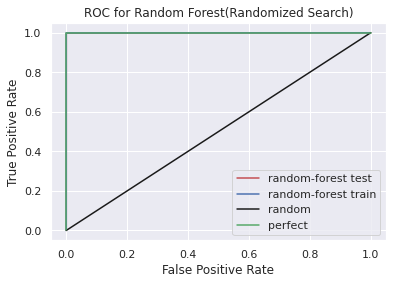

In [0]:
#Random Forest - ROC
plt.title('ROC for Random Forest(Randomized Search)')
plt.plot(fpr_rf_test, tpr_rf_test,'r-',label = 'random-forest test')
plt.plot(fpr_rf_train,tpr_rf_train,'b-', label= 'random-forest train')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

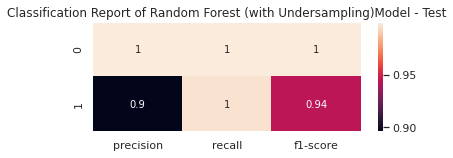

In [0]:
clr_rf_test1 = metrics.classification_report(y_test, y_pred_rf_Grid_bestmodel_test, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df1 = pd.DataFrame(clr_rf_test1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df1, annot=True)
plt.title("Classification Report of Random Forest (with Undersampling)Model - Test")
ax.set_ylim(len(df1)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

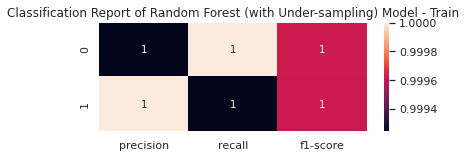

In [0]:
clr_rf_train1 = metrics.classification_report(y_train_res, y_pred_rf_Grid_train, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df2 = pd.DataFrame(clr_rf_train1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df2, annot=True)
plt.title("Classification Report of Random Forest (with Under-sampling) Model - Train")
ax.set_ylim(len(df2)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

# AdaBoost Classifier with Under-sampling - Randomized Grid Search

In [0]:
# Create a Adaboost Classifier instance 
ada = AdaBoostClassifier(random_state=SEED)

#Create dictionary of parameters 
ada_param_grid = {
    'n_estimators'      : [100, 200, 300, 400],
    'learning_rate'         : [0.2,0.4,0.6,0.8,1,1.2],
    'random_state'      : [42]
}

ada_Grid = RandomizedSearchCV(ada, ada_param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose= 5)
ada_Grid = ada_Grid.fit(X_train_res,y_train_res)

#find best estimator from RandomizedSearchCV to predict on test data.
ada_Grid_best_estimator = ada_Grid.best_estimator_

#Use best estimator from RandomizedSearchCV to predict on test data.
y_pred_ada_Grid_bestmodel_test = ada_Grid_best_estimator.predict(X_test)

# Generate confusion matrix and classification report 
cm_ada_Grid_test = metrics.confusion_matrix(y_test, y_pred_ada_Grid_bestmodel_test)
clr_ada_Grid_test = metrics.classification_report(y_test, y_pred_ada_Grid_bestmodel_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


In [0]:
ada_Grid_best_estimator

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=42)

In [0]:
ada_Grid.best_params_

{'learning_rate': 0.8, 'n_estimators': 100, 'random_state': 42}

In [0]:
# Print confusion matrix 
print(cm_ada_Grid_test)

[[1268299    2605]
 [      4    1616]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_ada_test, FP_ada_test, FN_ada_test, TP_ada_test = confusion_matrix(y_test, y_pred_ada_Grid_bestmodel_test).ravel()
print(TN_ada_test, FP_ada_test, FN_ada_test, TP_ada_test)  

1268299 2605 4 1616


In [0]:
# True positive 
TPR_ada_test = TP_ada_test/(TP_ada_test+FN_ada_test)

In [0]:
#false positive rate 
FPR_ada_test = FP_ada_test/(FP_ada_test+TN_ada_test)

In [0]:
# True Negative
TNR_ada_test = TN_ada_test/(TN_ada_test+FP_ada_test) 

In [0]:
# False Negative 
FNR_ada_test = FN_ada_test/(TP_ada_test+FN_ada_test)

In [0]:
# Print classification report
print(clr_ada_Grid_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.38      1.00      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.69      1.00      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [0]:
# Calculate predicted probabilities 
y_prob_ada_Grid_bestmodel_test  = ada_Grid_best_estimator.predict_proba(X_test)
# Calculate roc_auc_score for class 1 
ada_Grid_roc_auc_test = metrics.roc_auc_score(y_test, y_prob_ada_Grid_bestmodel_test[:,1])
print(ada_Grid_roc_auc_test)

0.9997396788350053


In [0]:
# Predict train data 
y_pred_ada_Grid_train = ada_Grid_best_estimator.predict(X_train_res)

# Generate confusion matrix and classification report 
cm_ada_Grid_train = metrics.confusion_matrix(y_train_res, y_pred_ada_Grid_train)
clr_ada_Grid_train = metrics.classification_report(y_train_res,y_pred_ada_Grid_train)

In [0]:
# Print confusion matrix
print(cm_ada_Grid_train)

[[6587    6]
 [  25 6568]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_ada_train, FP_ada_train, FN_ada_train, TP_ada_train = confusion_matrix(y_train_res, y_pred_ada_Grid_train).ravel()
print(TN_ada_train, FP_ada_train, FN_ada_train, TP_ada_train)  

6587 6 25 6568


In [0]:
# True positive 
TPR_ada_train = TP_ada_train/(TP_ada_train+FN_ada_train)

In [0]:
#false positive rate 
FPR_ada_train = FP_ada_train/(FP_ada_train+TN_ada_train)

In [0]:
# True Negative
TNR_ada_train = TN_ada_train/(TN_ada_train+FP_ada_train) 

In [0]:
# False Negative 
FNR_ada_train = FN_ada_train/(TP_ada_train+FN_ada_train)

In [0]:
# Print classification report
print(clr_ada_Grid_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186



In [0]:
# Calculate predicted probabilities 
y_prob_ada_Grid_bestmodel_train  = ada_Grid_best_estimator.predict_proba(X_train_res)
# Calculate roc_auc_score for class 1 
ada_Grid_roc_auc_train = metrics.roc_auc_score(y_train_res, y_prob_ada_Grid_bestmodel_train[:,1])
print(ada_Grid_roc_auc_train)

0.9999499167760373


In [0]:
MSE_ada_test = mean_squared_error(y_test, y_pred_ada_Grid_bestmodel_test)
print('Mean squared error - Test: %.4f'
      % MSE_ada_test)

Mean squared error - Test: 0.0021


In [0]:
MSE_ada_train = mean_squared_error(y_train_res, y_pred_ada_Grid_train)
print('Mean squared error - Train: %.4f'
      % MSE_ada_train)

Mean squared error - Train: 0.0024


In [0]:
fpr_ada_test, tpr_ada_test, thresholds_ada_test = roc_curve(y_test, y_pred_ada_Grid_bestmodel_test)
fpr_ada_train, tpr_ada_train, thresholds_ada_train = roc_curve(y_train_res, y_pred_ada_Grid_train)

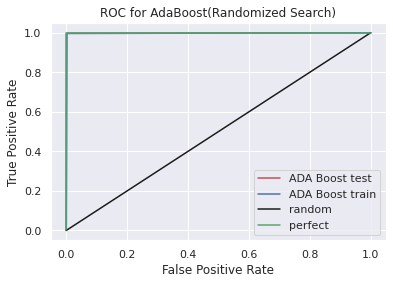

In [0]:
#Ada Boost - Test 
plt.title('ROC for AdaBoost(Randomized Search)')
plt.plot(fpr_ada_test, tpr_ada_test,'r-',label = 'ADA Boost test')
plt.plot(fpr_ada_train,tpr_ada_train,'b-', label= 'ADA Boost train')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

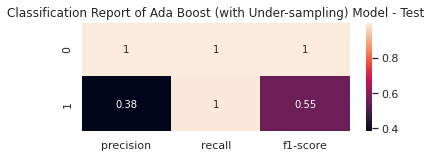

In [0]:
clr_ada_test1 = metrics.classification_report(y_test, y_pred_ada_Grid_bestmodel_test, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df3 = pd.DataFrame(clr_ada_test1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df3, annot=True)
plt.title("Classification Report of Ada Boost (with Under-sampling) Model - Test")
ax.set_ylim(len(df3)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

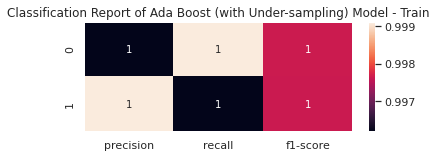

In [0]:
clr_ada_train1 = metrics.classification_report(y_train_res, y_pred_ada_Grid_train, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df4 = pd.DataFrame(clr_ada_train1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df4, annot=True)
plt.title("Classification Report of Ada Boost (with Under-sampling) Model - Train")
ax.set_ylim(len(df4)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

# Gradient Boost with Under-sampling - Randomized Grid Search

In [0]:
# Create a Gradient Boost instance 
gbc = GradientBoostingClassifier(random_state = SEED)

#Create dictionary of parameters 
gbc_param_grid = {
    'n_estimators'      : [100, 200, 300, 400],
    'learning_rate'         : [0.2, 0.4,0.6,0.8,1],
    'max_depth'             : [1,2],
    'random_state'      : [42]
}

gbc_Grid = RandomizedSearchCV(gbc, gbc_param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose= 5)
gbc_Grid = gbc_Grid.fit(X_train_res,y_train_res)

#find best estimator from RandomizedSearchCV to predict on test data.
gbc_Grid_best_estimator = gbc_Grid.best_estimator_

#Use best estimator from RandomizedSearchCV to predict on test data.
y_pred_gbc_Grid_bestmodel_test = gbc_Grid_best_estimator.predict(X_test)

# Generate confusion matrix and classification report 
cm_gbc_Grid_test = metrics.confusion_matrix(y_test, y_pred_gbc_Grid_bestmodel_test)
clr_gbc_Grid_test = metrics.classification_report(y_test, y_pred_gbc_Grid_bestmodel_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


In [0]:
gbc_Grid_best_estimator

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gbc_Grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400, 'random_state': 42}

In [0]:
# Print confusion matrix 
print(cm_gbc_Grid_test)

[[1269759    1145]
 [      3    1617]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_gbc_test, FP_gbc_test, FN_gbc_test, TP_gbc_test = confusion_matrix(y_test, y_pred_gbc_Grid_bestmodel_test).ravel()
print(TN_gbc_test, FP_gbc_test, FN_gbc_test, TP_gbc_test)  

1269759 1145 3 1617


In [0]:
# True positive 
TPR_gbc_test = TP_gbc_test/(TP_gbc_test+FN_gbc_test)

In [0]:
#false positive rate 
FPR_gbc_test = FP_gbc_test/(FP_gbc_test+TN_gbc_test)

In [0]:
# True Negative
TNR_gbc_test = TN_gbc_test/(TN_gbc_test+FP_gbc_test)

In [0]:
# False Negative 
FNR_gbc_test = FN_gbc_test/(TP_gbc_test+FN_gbc_test)

In [0]:
# Print classification report
print(clr_gbc_Grid_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.59      1.00      0.74      1620

    accuracy                           1.00   1272524
   macro avg       0.79      1.00      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



In [0]:
## Calculate predicted probabilities 
y_prob_gbc_Grid_bestmodel_test  = gbc_Grid_best_estimator.predict_proba(X_test)
# Calculate roc_auc_score for class 1 
gbc_Grid_roc_auc_test = metrics.roc_auc_score(y_test, y_prob_gbc_Grid_bestmodel_test[:,1])
print(gbc_Grid_roc_auc_test)

0.999654827451295


In [0]:
# Predict train data 
y_pred_gbc_Grid_train = ada_Grid_best_estimator.predict(X_train_res)

# Generate confusion matrix and classification report 
cm_gbc_Grid_train = metrics.confusion_matrix(y_train_res, y_pred_gbc_Grid_train)
clr_gbc_Grid_train = metrics.classification_report(y_train_res,y_pred_gbc_Grid_train)

In [0]:
# Print confusion matrix 
print(cm_gbc_Grid_train)

[[6587    6]
 [  25 6568]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_gbc_train, FP_gbc_train, FN_gbc_train, TP_gbc_train = confusion_matrix(y_train_res,y_pred_gbc_Grid_train).ravel()
print(TN_gbc_train, FP_gbc_train, FN_gbc_train, TP_gbc_train)  

6587 6 25 6568


In [0]:
# True positive 
TPR_gbc_train = TP_gbc_train/(TP_gbc_train+FN_gbc_train)

In [0]:
#false positive rate 
FPR_gbc_train = FP_gbc_train/(FP_gbc_train+TN_gbc_train)

In [0]:
# True Negative
TNR_gbc_train = TN_gbc_train/(TN_gbc_train+FP_gbc_train)

In [0]:
# False Negative 
FNR_gbc_train = FN_gbc_train/(TP_gbc_train+FN_gbc_train)

In [0]:
# Print classification report
print(clr_gbc_Grid_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186



In [0]:
## Calculate predicted probabilities 
y_prob_gbc_Grid_bestmodel_train  = gbc_Grid_best_estimator.predict_proba(X_train_res)
# Calculate roc_auc_score for class 1 
gbc_Grid_roc_auc_train = metrics.roc_auc_score(y_train_res, y_prob_gbc_Grid_bestmodel_train[:,1])
print(gbc_Grid_roc_auc_train)

1.0


In [0]:
MSE_gbc_test = mean_squared_error(y_test, y_pred_gbc_Grid_bestmodel_test)
print('Mean squared error - Test: %.4f'
      % MSE_gbc_test)

Mean squared error - Test: 0.0009


In [0]:
MSE_gbc_train = mean_squared_error(y_train_res, y_pred_gbc_Grid_train)
print('Mean squared error - Train: %.4f'
      % MSE_gbc_train)

Mean squared error - Train: 0.0024


In [0]:
fpr_gbc_test, tpr_gbc_test, thresholds_gbc_test = roc_curve(y_test, y_pred_gbc_Grid_bestmodel_test)
fpr_gbc_train, tpr_gbc_train, thresholds_gbc_train = roc_curve(y_train_res, y_pred_gbc_Grid_train)

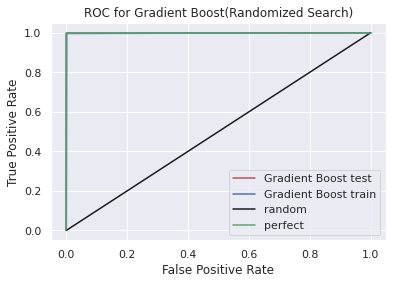

In [0]:
plt.title('ROC for Gradient Boost(Randomized Search)')
plt.plot(fpr_gbc_test, tpr_gbc_test,'r-',label = 'Gradient Boost test')
plt.plot(fpr_gbc_train,tpr_gbc_train,'b-', label= 'Gradient Boost train')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

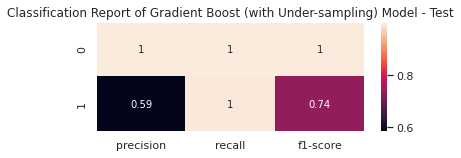

In [0]:
clr_gbc_test1 = metrics.classification_report(y_test, y_pred_gbc_Grid_bestmodel_test, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df5 = pd.DataFrame(clr_gbc_test1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df5, annot=True)
plt.title("Classification Report of Gradient Boost (with Under-sampling) Model - Test")
ax.set_ylim(len(df5)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

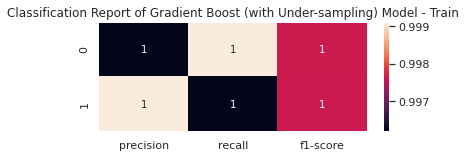

In [0]:
clr_gbc_train1 = metrics.classification_report(y_train_res,y_pred_gbc_Grid_train, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df6 = pd.DataFrame(clr_gbc_train1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df6, annot=True)
plt.title("Classification Report of Gradient Boost (with Under-sampling) Model - Train")
ax.set_ylim(len(df6)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

# XGBoost without with Under-sampling - Randomized Grid Search

In [0]:
# Create a XGBoost instance 
xgb = XGBClassifier(random_state = SEED)

n_estimators = list(np.arange(100,1050,50,dtype=int))
#n_estimators 

learning_rate = list(np.arange(0.1,1.7,.1,dtype=float))
#learning_rate

gamma = list(np.arange(0,5.25,.25,dtype=float))
#gamma

xgb_param_grid = {
     'n_estimators'    : n_estimators ,
     'learning_rate'   : learning_rate, 
     'max_depth'       : [1,2],
     'gamma' : gamma,
}

xgb_Grid = RandomizedSearchCV(xgb, xgb_param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose= 5)
xgb_Grid = xgb_Grid.fit(X_train_res,y_train_res)

#find best estimator from RandomizedSearchCV to predict on test data.
xgb_Grid_best_estimator = xgb_Grid.best_estimator_

#Use best estimator from RandomizedSearchCV to predict on test data.
y_pred_xgb_Grid_bestmodel_test = xgb_Grid_best_estimator.predict(X_test)

# Generate confusion matrix and classification report 
cm_xgb_Grid_test = metrics.confusion_matrix(y_test, y_pred_xgb_Grid_bestmodel_test)
clr_xgb_Grid_test = metrics.classification_report(y_test, y_pred_xgb_Grid_bestmodel_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


In [0]:
xgb_Grid_best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4.5,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_Grid.best_params_

{'gamma': 4.5,
 'learning_rate': 0.30000000000000004,
 'max_depth': 2,
 'n_estimators': 700}

In [0]:
# Calculate predicted probabilities 
y_prob_xgb_Grid_bestmodel_test  = xgb_Grid_best_estimator.predict_proba(X_test)
# Calculate roc_auc_score for class 1 
xgb_Grid_roc_auc_test = metrics.roc_auc_score(y_test, y_prob_xgb_Grid_bestmodel_test[:,1])
print(xgb_Grid_roc_auc_test)


0.9998214185520361


In [0]:
print(cm_xgb_Grid_test)

[[1270746     158]
 [      4    1616]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_xgb_test, FP_xgb_test, FN_xgb_test, TP_xgb_test = confusion_matrix(y_test, y_pred_xgb_Grid_bestmodel_test).ravel()
print(TN_xgb_test, FP_xgb_test, FN_xgb_test, TP_xgb_test)  

1270746 158 4 1616


In [0]:
# True positive 
TPR_xgb_test = TP_xgb_test/(TP_xgb_test+FN_xgb_test)

In [0]:
#false positive rate 
FPR_xgb_test = FP_xgb_test/(FP_xgb_test+TN_xgb_test)

In [0]:
# True Negative
TNR_xgb_test = TN_xgb_test/(TN_xgb_test+FP_xgb_test)

In [0]:
# False Negative 
FNR_xgb_test = FN_xgb_test/(TP_xgb_test+FN_xgb_test)

In [0]:
# Print classification report
print(clr_xgb_Grid_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      1.00      0.95      1620

    accuracy                           1.00   1272524
   macro avg       0.96      1.00      0.98   1272524
weighted avg       1.00      1.00      1.00   1272524



In [0]:
# Predict train data 
y_pred_xgb_Grid_train = xgb_Grid_best_estimator.predict(X_train_res)

# Generate confusion matrix and classification report 
cm_xgb_Grid_train = metrics.confusion_matrix(y_train_res, y_pred_xgb_Grid_train)
clr_xgb_Grid_train = metrics.classification_report(y_train_res,y_pred_xgb_Grid_train)

In [0]:
# Print confusion matrix
print(cm_xgb_Grid_train)

[[6593    0]
 [  29 6564]]


In [0]:
# extracting TP, TN, FP, and FN values from CM 
TN_xgb_train, FP_xgb_train, FN_xgb_train, TP_xgb_train = confusion_matrix(y_train_res,y_pred_xgb_Grid_train).ravel()
print(TN_xgb_train, FP_xgb_train, FN_xgb_train, TP_xgb_train)  

6593 0 29 6564


In [0]:
# True positive 
TPR_xgb_train = TP_xgb_train/(TP_xgb_train+FN_xgb_train)

In [0]:
#false positive rate 
FPR_xgb_train = FP_xgb_train/(FP_xgb_train+TN_xgb_train)

In [0]:
# True Negative
TNR_xgb_train = TN_xgb_train/(TN_xgb_train+FP_xgb_train)

In [0]:
# False Negative 
FNR_xgb_train = FN_xgb_train/(TP_xgb_train+FN_xgb_train)

In [0]:
# Print classification report
print(clr_xgb_Grid_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186



In [0]:
# Calculate predicted probabilities 
y_prob_xgb_Grid_bestmodel_train  = xgb_Grid_best_estimator.predict_proba(X_train_res)
# Calculate roc_auc_score for class 1 
xgb_Grid_roc_auc_train = metrics.roc_auc_score(y_train_res, y_prob_xgb_Grid_bestmodel_train[:,1])
print(xgb_Grid_roc_auc_train)


0.9998530401310638


In [0]:
MSE_xgb_test = mean_squared_error(y_test, y_pred_xgb_Grid_bestmodel_test)
print('Mean squared error - Test: %.4f'
      % MSE_xgb_test)

Mean squared error - Test: 0.0001


In [0]:
MSE_xgb_train = mean_squared_error(y_train_res,y_pred_xgb_Grid_train)
print('Mean squared error - Train: %.4f'
      % MSE_xgb_train)

Mean squared error - Train: 0.0022


In [0]:
fpr_xgb_test, tpr_xgb_test, thresholds_xgb_test = roc_curve(y_test, y_pred_xgb_Grid_bestmodel_test)
fpr_xgb_train, tpr_xgb_train, thresholds_xgb_train = roc_curve(y_train_res,y_pred_xgb_Grid_train)

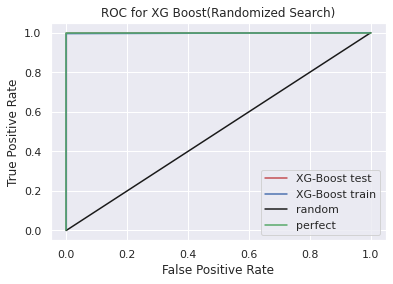

In [0]:
plt.title('ROC for XG Boost(Randomized Search)')
plt.plot(fpr_xgb_test, tpr_xgb_test,'r-',label = 'XG-Boost test')
plt.plot(fpr_xgb_train,tpr_xgb_train,'b-', label= 'XG-Boost train')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

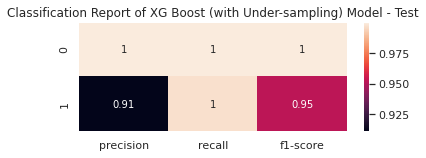

In [0]:
clr_xgb_test1 = metrics.classification_report(y_test, y_pred_xgb_Grid_bestmodel_test, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df7 = pd.DataFrame(clr_xgb_test1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df7, annot=True)
plt.title("Classification Report of XG Boost (with Under-sampling) Model - Test")
ax.set_ylim(len(df7)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

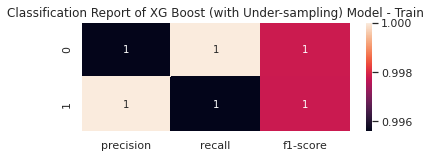

In [0]:
clr_xgb_train1 = metrics.classification_report(y_train_res,y_pred_xgb_Grid_train, output_dict=True)
#clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
df8 = pd.DataFrame(clr_xgb_train1).iloc[:-1, :2].T
fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df8, annot=True)
plt.title("Classification Report of XG Boost (with Under-sampling) Model - Train")
ax.set_ylim(len(df8)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

# **Models Summary** 

In [0]:
models_summary_test = [['Random Forest',TPR_rf_test,FPR_rf_test,TNR_rf_test,FNR_rf_test,rf_Grid_roc_auc_test,MSE_rf_test],
                  ['AdaBoost',TPR_ada_test,FPR_ada_test,TNR_ada_test,FNR_ada_test,ada_Grid_roc_auc_test,MSE_ada_test],
                  ['GradientBoost',TPR_gbc_test,FPR_gbc_test,TNR_gbc_test,FNR_gbc_test,ada_Grid_roc_auc_test,MSE_gbc_test],
                  ['XGBoost ',TPR_xgb_test,FPR_xgb_test,TNR_xgb_test,FNR_xgb_test,xgb_Grid_roc_auc_test,MSE_xgb_test]]
models_summary_test_df = pd.DataFrame(models_summary_test,columns=['Test Model','True Positive Rate','False Positive Rate','True Negative Rate','False Negative Rate','AUC score','MSE'])
models_summary_test_df

,Test Model,True Positive Rate,False Positive Rate,True Negative Rate,False Negative Rate,AUC score,MSE
0,Random Forest,0.997531,0.000148,0.999852,0.002469,0.999604,0.000151
1,AdaBoost,0.997531,0.002050,0.997950,0.002469,0.999740,0.002050
2,GradientBoost,0.998148,0.000901,0.999099,0.001852,0.999740,0.000902
3,XGBoost,0.997531,0.000124,0.999876,0.002469,0.999821,0.000127


In [0]:
models_summary_train = [['Random Forest',TPR_rf_train,FPR_rf_train,TNR_rf_train,FNR_rf_train,rf_Grid_roc_auc_train,MSE_rf_train],
                  ['AdaBoost',TPR_ada_train,FPR_ada_train,TNR_ada_train,FNR_ada_train,ada_Grid_roc_auc_train,MSE_ada_train],
                  ['GradientBoost',TPR_gbc_train,FPR_gbc_train,TNR_gbc_train,FNR_gbc_train,gbc_Grid_roc_auc_train,MSE_gbc_train],
                  ['XGBoost ',TPR_xgb_train,FPR_xgb_train,TNR_xgb_train,FNR_xgb_train,xgb_Grid_roc_auc_train,MSE_xgb_train]]
models_summary_train_df = pd.DataFrame(models_summary_train,columns=['Train Model','True Positive Rate','False Positive Rate','True Negative Rate','False Negative Rate','AUC score','MSE'])
models_summary_train_df

,Train Model,True Positive Rate,False Positive Rate,True Negative Rate,False Negative Rate,AUC score,MSE
0,Random Forest,0.999242,0.00000,1.00000,0.000758,1.000000,0.000379
1,AdaBoost,0.996208,0.00091,0.99909,0.003792,0.999950,0.002351
2,GradientBoost,0.996208,0.00091,0.99909,0.003792,1.000000,0.002351
3,XGBoost,0.995601,0.00000,1.00000,0.004399,0.999853,0.002199


This is a financial fraud detection casestudy - therefore data is highly imbalanced. Our dataset is extremely high (~6.3 million rows). Therefore, oversampling techniques such as SMOTE and ADASYN took forever to run. Therefore, in this notebook I conducted random under sampling technique  purposes of understanding the outcomes of the models : RF, Ada Boost, Gradient Boost & XGBoost using RandomGrid Search.

By using undersampling technique, we randomly reduced the size of the majority class (not fraud) to be equal to the minority class (fruad). This results in a loss of not fraud data, but helps speed up the algorithm. As we saw the train dataset is balanced with respect to fraud and unfraud data points, however, the test validation is performed on a severly unbalanced dataset. Therefore, I think looking into TPR, FNR, FPR are good indicators of model validation.

Since this is fraud data, I was most interested in the False positive, False negative rates and True positives. The reason is as follows : 

**False Positive : Transactions that were not fraud but were classified as fraud**. From an industry standpoint, if we were to take any action (such as block an account) on transactions detected as fraud, we would like for us to predict this well. No customer is going to be happy if we block their account when they made a legitimate transaction. High false positive rates will result in losing customers, and will be bad for the business. 

**False Negative : Transactions that fraud but were classified as not fraud**. No customer is going to be happy if we dont block their account and safe guard their money when their account was compromised. High false negative rates will result in losing customers due to lack of securityof their hard earned money, and will be bad for the business. 

**True Positive : Transactions that were fraud and classified as Fraud**
TPR of the test data of particular importance to me since we had a balance train data, but severly unbalanced test dataset. So if the model we trained is able to produce a high sensitivity rate to detect fraud during validation, we can say that the model did well. 




Following is my analysis : 
- RF and XGboost both perform well in training, testing with respect to FPR and FNR. 
- FNR and FPR of the AdaBoost and Gradient boost have higher FPR and FNR when compared to RF and XGBoost. 
- Selected XGBoost to be the best performing model overall since it had the lowest False positive rate when validating.